In [1]:
from pyhive import hive
import pandas as pd

In [2]:
conn = hive.Connection('localhost', port=10000)

In [3]:
cursor = conn.cursor()
cursor.execute('SHOW DATABASES')
cursor.fetchall()

[('default',)]

In [7]:
cursor.execute('select * from default.tweets')


In [8]:
dataframe = pd.read_sql("SELECT * FROM default.tweets", conn)

In [9]:
dataframe.head(30)

,tweets.id,tweets.text,tweets.date,tweets.score
0,1439744981292486665,este hilo es que si la antítesis de todo lo qu...,2021-09-20,0.0
1,1439744981598621697,RT @justinbieber: Today is the last day to bid...,2021-09-20,0.0
2,1439744981783121921,RT @1485message: 210920 🐣💭 Have a great Chuseo...,2021-09-20,2.0
3,1439744982307463174,@pinkhairmina girl yeah I forgot we threw out ...,2021-09-20,0.0
4,1439744987562975237,RT @DailyMirror: PM warns supermarket shelves ...,2021-09-20,0.0
5,1439744987563008004,RT @Vannahboo100: College students should have...,2021-09-20,0.0
6,1439744987957121030,RT @0304wari: op asked beomgyu to say a word t...,2021-09-20,1.0
7,1439744988175343620,"SOUTHERN CLASSIC , SOUTHERN MAID DONUTS & ORLA...",2021-09-20,0.0
8,1439744989097984009,@RitaPanahi Something similar happened in Brit...,2021-09-20,0.0
9,1439744990683541515,RT @CoachMcGhghy: Andrew McGhghy Macomb High S...,2021-09-20,0.0


In [10]:
df = pd.read_sql("DESCRIBE DATABASE EXTENDED default", conn)

In [11]:
df

,db_name,comment,location,owner_name,owner_type,parameters
0,default,Default Hive database,hdfs://namenode:8020/user/hive/warehouse,public,ROLE,


In [12]:
from pyspark.sql import SparkSession
#Create PySpark SparkSession
spark = SparkSession.builder \
    .master("local") \
    .appName("S") \
    .getOrCreate()
#Create PySpark DataFrame from Pandas
sparkDF=spark.createDataFrame(dataframe) 
sparkDF.registerTempTable("tweets")


21/09/21 16:38:45 WARN Utils: Your hostname, DESKTOP-2N36MID resolves to a loopback address: 127.0.1.1; using 192.168.159.1 instead (on interface eth2)
21/09/21 16:38:45 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
21/09/21 16:38:45 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [15]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.types import *
from pyspark.sql import Row
from pyspark.sql.functions import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [18]:
df1 = spark.sql("SELECT `tweets.score` , count(*) as count from tweets group by `tweets.score`").toPandas()
df1['tweets.score'] = df1['tweets.score'].replace('None', np.nan)
df1 = df1.dropna(axis=0, subset=['tweets.score'])
df1['sentiment'] = df1.apply(lambda row: 'negative' if float(row['tweets.score']) <= 0 else 'positive', axis = 1)
df1 = df1.drop(['tweets.score'], axis = 1)

21/09/21 16:42:05 WARN TaskSetManager: Stage 4 contains a task of very large size (158151 KiB). The maximum recommended task size is 1000 KiB.


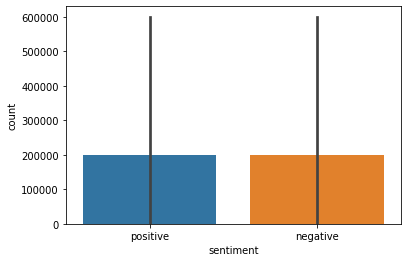

In [19]:
ax = sns.barplot(x="sentiment", y="count", data=df1)

In [20]:
df1 = spark.sql("SELECT `tweets.text` from tweets where `tweets.score` <= 0" ).toPandas()
df2 = spark.sql("SELECT `tweets.text` from tweets where `tweets.score` > 0").toPandas()

21/09/21 16:42:59 WARN TaskSetManager: Stage 6 contains a task of very large size (158151 KiB). The maximum recommended task size is 1000 KiB.
21/09/21 16:43:16 WARN TaskSetManager: Stage 7 contains a task of very large size (158151 KiB). The maximum recommended task size is 1000 KiB.


(-0.5, 799.5, 599.5, -0.5)

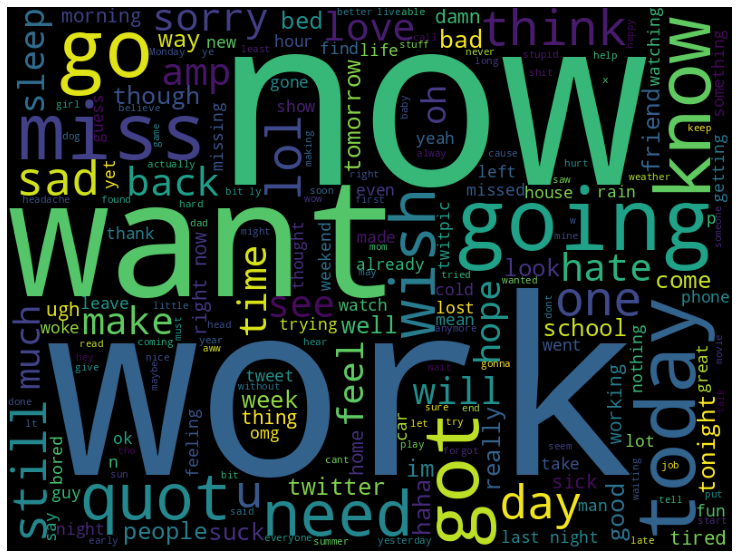

In [21]:
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600).generate(" ".join(df1["tweets.text"]))
plt.figure(figsize=(15,10))
plt.imshow(cloud)
plt.axis('off')

(-0.5, 799.5, 599.5, -0.5)

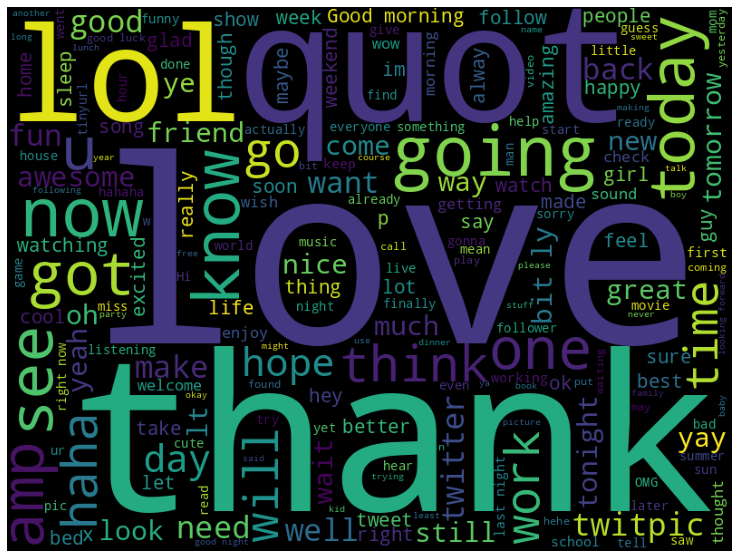

In [22]:
cloud = WordCloud(width=800, height=600).generate(" ".join(df2["tweets.text"]))
plt.figure(figsize=(15,10))
plt.imshow(cloud)
plt.axis('off')